In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report

In [25]:
import pandas as pd
df=pd.read_csv(r"D:\datasets2\playgolf_data.csv")
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [26]:
df['PlayGolf']=df['PlayGolf'].replace({'No':0,'Yes':1})
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,0
1,Sunny,Hot,High,Strong,0
2,Overcast,Hot,High,Weak,1
3,Rainy,Mild,High,Weak,1
4,Rainy,Cool,Normal,Weak,1
5,Rainy,Cool,Normal,Strong,0
6,Overcast,Cool,Normal,Strong,1
7,Sunny,Mild,High,Weak,0
8,Sunny,Cool,Normal,Weak,1
9,Rainy,Mild,Normal,Weak,1


Text(0.5, 1.0, 'Wind vs PlayGolf')

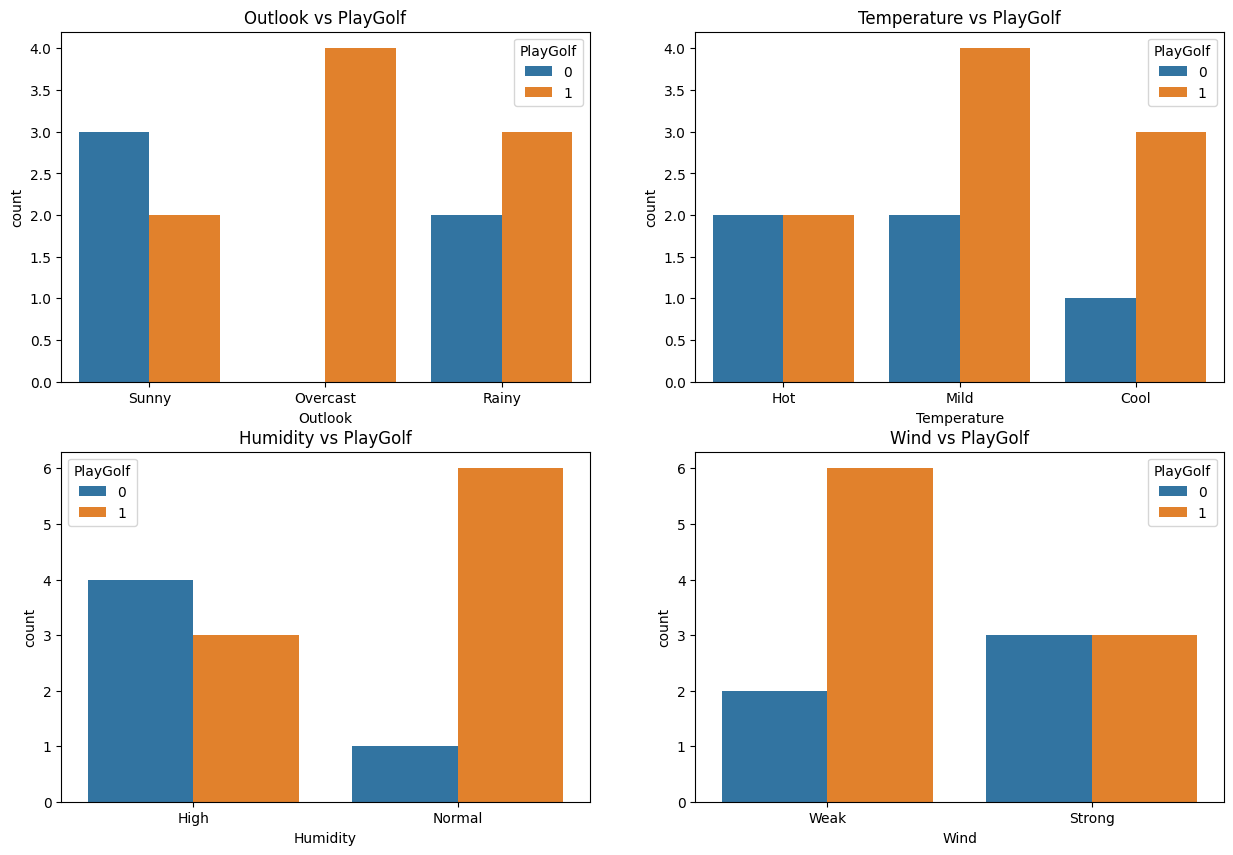

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(data=df,x='Outlook',hue='PlayGolf')
plt.title("Outlook vs PlayGolf")

plt.subplot(2,2,2)
sns.countplot(data=df,x='Temperature',hue='PlayGolf')
plt.title("Temperature vs PlayGolf")

plt.subplot(2,2,3)
sns.countplot(data=df,x='Humidity',hue='PlayGolf')
plt.title("Humidity vs PlayGolf")

plt.subplot(2,2,4)
sns.countplot(data=df,x='Wind',hue='PlayGolf')
plt.title("Wind vs PlayGolf")



In [28]:
df_encoded=pd.get_dummies(df,columns=['Outlook','Temperature','Humidity','Wind'],dtype=int)
df_encoded

,PlayGolf,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,0,1,0,1,0,1,0,0,1
1,0,0,0,1,0,1,0,1,0,1,0
2,1,1,0,0,0,1,0,1,0,0,1
3,1,0,1,0,0,0,1,1,0,0,1
4,1,0,1,0,1,0,0,0,1,0,1
5,0,0,1,0,1,0,0,0,1,1,0
6,1,1,0,0,1,0,0,0,1,1,0
7,0,0,0,1,0,0,1,1,0,0,1
8,1,0,0,1,1,0,0,0,1,0,1
9,1,0,1,0,0,0,1,0,1,0,1


In [29]:
x=df_encoded.iloc[:,1:]
y=df_encoded.iloc[:,0]

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=101)

In [31]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [32]:
predictions=model.predict(xtest)
print("accuracy of the model: ",accuracy_score(ytest,predictions))

accuracy of the model:  0.6666666666666666


In [33]:
print("classification_report: ",classification_report(ytest,predictions))

classification_report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
df2=pd.read_csv(r"D:\datasets2\playgolf_data2.csv")
df2

,Day,Outlook,Temperature,Humidity,Wind,PlayGolf
0,D1,Sunny,Mild,80,No,Yes
1,D2,Sunny,Hot,75,Yes,No
2,D3,Overcast,Hot,77,No,Yes
3,D4,Rainy,Cool,70,No,Yes
4,D5,Overcast,Cool,72,Yes,Yes
5,D6,Sunny,Mild,77,No,No
6,D7,Sunny,Cool,70,No,Yes
7,D8,Rainy,Mild,69,No,Yes
8,D9,Sunny,Mild,65,Yes,Yes
9,D10,Overcast,Mild,77,Yes,Yes


In [35]:
x=df2.drop(['Day','PlayGolf'],axis=1)
y=df2['PlayGolf'].replace({'Yes':1,'No':0})


In [36]:
x

,Outlook,Temperature,Humidity,Wind
0,Sunny,Mild,80,No
1,Sunny,Hot,75,Yes
2,Overcast,Hot,77,No
3,Rainy,Cool,70,No
4,Overcast,Cool,72,Yes
5,Sunny,Mild,77,No
6,Sunny,Cool,70,No
7,Rainy,Mild,69,No
8,Sunny,Mild,65,Yes
9,Overcast,Mild,77,Yes


In [37]:
y

0     1
1     0
2     1
3     1
4     1
5     0
6     1
7     1
8     1
9     1
10    1
11    0
12    0
13    1
Name: PlayGolf, dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
x['Temperature']=encoder.fit_transform(x['Temperature'])
x['Wind']=encoder.fit_transform(x['Temperature'])
x['Outlook']=encoder.fit_transform(x['Outlook'])

In [42]:
x

,Outlook,Temperature,Humidity,Wind
0,3,2,80,2
1,3,1,75,1
2,0,1,77,1
3,2,0,70,0
4,0,0,72,0
5,3,2,77,2
6,3,0,70,0
7,2,2,69,2
8,3,2,65,2
9,0,2,77,2


In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=101)

In [44]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [45]:
predictions=model.predict(xtest)
print("accuracy of the model: ",accuracy_score(ytest,predictions))

accuracy of the model:  0.6666666666666666


In [46]:
print("classification_report: ",classification_report(ytest,predictions))

classification_report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
